In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

X=np.random.uniform(0,1,1000)
Y=np.random.uniform(0,1,1000)
df_xy=pd.DataFrame(columns=["X","Y"])
print(df_xy.head())


Empty DataFrame
Columns: [X, Y]
Index: []


          X         Y
0  0.891538  0.167947
1  0.728640  0.138404
2  0.971344  0.908140
3  0.088849  0.476944
4  0.143079  0.977062


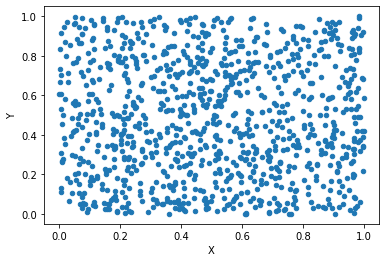

C:\Users\MAHESHWARI\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\MAHESHWARI\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\MAHESHWARI\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\MAHESHWARI\Anaconda3\lib\site-packages\pa

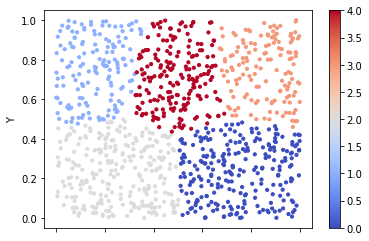

In [4]:
df_xy.X=X
df_xy.Y=Y
print(df_xy.head())

df_xy.plot(x="X",y="Y",kind="scatter")
plt.show("waiting for input")


model1=KMeans(n_clusters=5).fit(df_xy)
df_xy.plot(x="X",y="Y",
	c=model1.labels_,kind='scatter',s=10,cmap=plt.cm.coolwarm)
plt.show()


In [6]:
crime_data=pd.read_csv("C:/Users/MAHESHWARI/datasciencecourse/1DATA SCIENCE COURSE DATA SETS/Assignments/Clustering/crime_data.csv")
print(crime_data.head())

def norm_fun(i):
	x=(i-i.min()) / (i.max()   -   i.min())
	return (x)

df_norm=norm_fun(crime_data.iloc[:,1:])
print (df_norm.head())


   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
     Murder   Assault  UrbanPop      Rape
0  0.746988  0.654110  0.440678  0.359173
1  0.554217  0.746575  0.271186  0.961240
2  0.439759  0.852740  0.813559  0.612403
3  0.481928  0.496575  0.305085  0.315245
4  0.493976  0.791096  1.000000  0.860465


In [7]:
k = list(range(2,20))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    

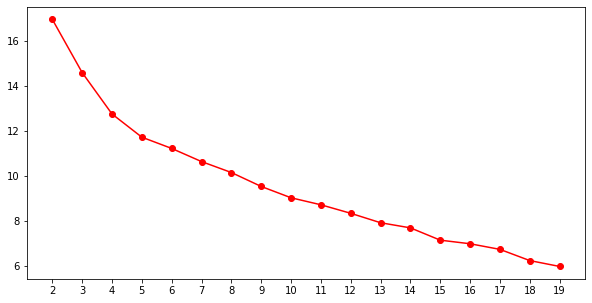

In [8]:
plt.figure(figsize=(10,5))
plt.plot(k,TWSS,'ro-')
plt.xticks(k)
plt.show()

In [10]:
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime_data['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [12]:
crime_data = crime_data.iloc[:,[5,0,1,2,3,4]]

crime_data.iloc[:,1:7].groupby(crime_data.clust).mean()

crime_data.to_csv("crime-data.csv")